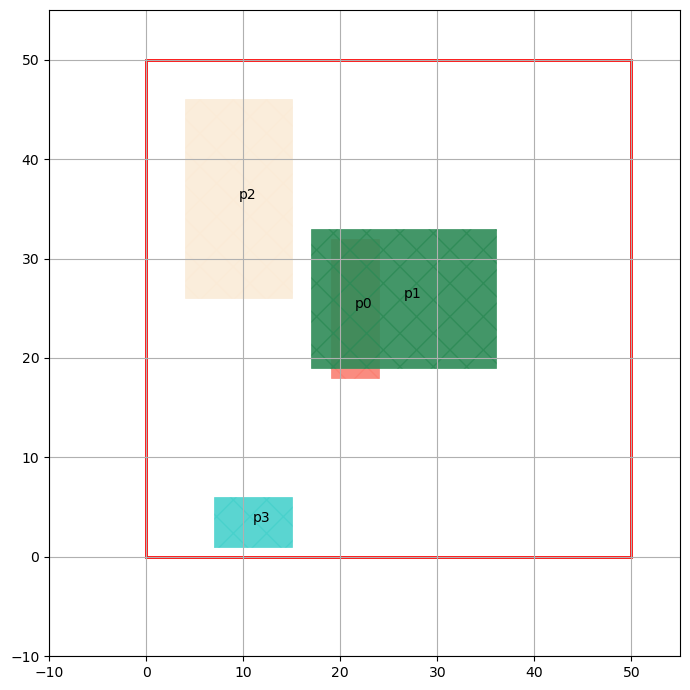

In [17]:
from util import *
from generation import *
from conditions import *

layout_zone         = Rectangle(0,0,50,50)    #{"xmin"   : 0, "ymin"   : 0, "width"  : 100, "height" : 100}
participants        = generate_unconnected_participants(4, layout_zone, 20, 20, 444)
ds_goal             = 15.0

plot_size           = 1.1 * layout_zone.width


a = plot_participants(layout_zone, participants, plot_size, plot_size, plot_connections= True)

In [18]:
participants

Participants(p0=Participant(idx='p0', connections=(), xmin=19, ymin=18, width=5, height=14, clashes=Clashes(p0=0, p1=0, p2=0, p3=0), aversions=Aversions(p0=0, p1=0, p2=0, p3=0), interference=0, overlap_with_idx=(), turmoil=0, relaxed_connections=0, protrusion_status='', protrusion_extend=0, protruded_zone_edges=(), healthy=True, compliant=True, yield_polygon=(), freespace=(), secondary_freespace_north_east=(), secondary_freespace_south_east=(), secondary_freespace_south_west=(), secondary_freespace_north_west=(), last_move='', color='salmon'), p1=Participant(idx='p1', connections=(), xmin=17, ymin=19, width=19, height=14, clashes=Clashes(p0=0, p1=0, p2=0, p3=0), aversions=Aversions(p0=0, p1=0, p2=0, p3=0), interference=0, overlap_with_idx=(), turmoil=0, relaxed_connections=0, protrusion_status='', protrusion_extend=0, protruded_zone_edges=(), healthy=True, compliant=True, yield_polygon=(), freespace=(), secondary_freespace_north_east=(), secondary_freespace_south_east=(), secondary_fre

In [19]:
calculate_overlap(participants.p3, participants.p1)

((), [False, False, False, False, False, False])

In [20]:
pstar               = participants.p1

In [21]:
# determine free edges


conditions          = [calculate_lateral_condition(pstar, p , 0.5, 0.5, 100) for p in participants if p.idx != pstar.idx]

masks_edges         = [cond.locations for cond in conditions]

free_edges_bool     = [all(mask[i] for mask in masks_edges) for i in range(4)]

free_edges_str      = [y for (x,y) in zip(free_edges_bool, ['west', 'east', 'north', 'south']) if x]

free_edges_str

['west', 'east', 'north']

In [22]:
calclulate_free_space(pstar, free_edges_str, participants, layout_zone)

Rectangle(xmin=15, ymin=19, width=35, height=31)

In [23]:
# determine free vertices

overlaps            = [cond.overlap for cond in conditions if cond.overlap]

print(overlaps)

masks_corners       = [calculate_free_corners(pstar, Ov, layout_zone) for Ov in overlaps]
free_vertices_bool  = [all(mask[i] for mask in masks_corners) for i in range(4)]
#print(free_vertices_bool)
free_vertices_str   = [y for (x,y) in zip(free_vertices_bool, [('left', 'top'), ('right', 'top'), ('left', 'bottom'), ('right', 'bottom')]) if x]

free_vertices_str

[Rectangle(xmin=19, ymin=19, width=5, height=13)]


[('left', 'top'), ('right', 'top'), ('left', 'bottom'), ('right', 'bottom')]

In [24]:
calclulate_all_secondary_free_spaces(pstar, free_vertices_str, participants, layout_zone)

p1
[]
17
33
[(50, 0)]
36
33
[(50, 0)]
36
19
[(50, 0)]
17
19
[(50, 0)]


(Rectangle(xmin=15, ymin=0, width=35, height=50),
 Rectangle(xmin=15, ymin=0, width=35, height=50),
 Rectangle(xmin=24, ymin=0, width=26, height=50),
 Rectangle(xmin=0, ymin=0, width=19, height=50))